In [1]:
from skimage import io

In [2]:
import glob

In [14]:
images = []
for filename in sorted(glob.glob("./data/*.png")):
        print(filename)
        images.append(io.imread(filename, as_gray=True))

./data/shot0003.png
./data/shot0004.png
./data/shot0005.png
./data/shot0006.png
./data/shot0007.png
./data/shot0008.png
./data/shot0009.png
./data/shot0010.png
./data/shot0011.png
./data/shot0012.png
./data/shot0013.png
./data/shot0014.png
./data/shot0015.png


In [15]:
import numpy as np

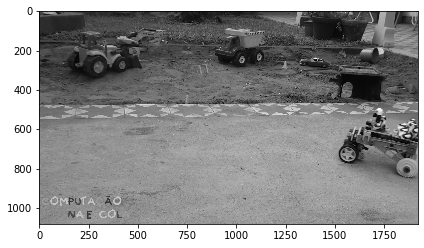

In [16]:
io.imshow(images[0])

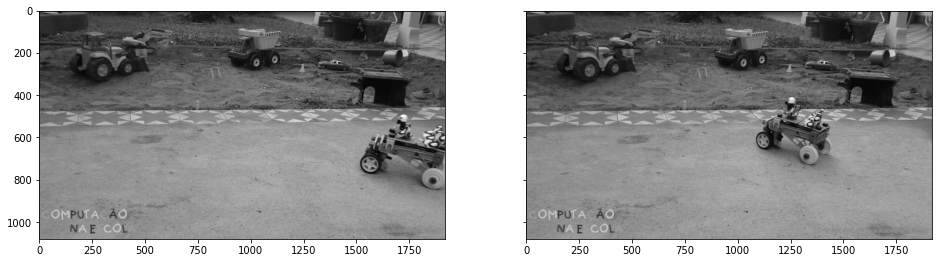

In [17]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(images[0], 'gray')
ax[1].imshow(images[2], 'gray')

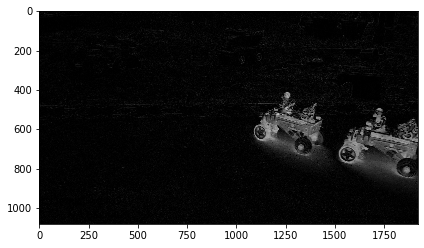

In [18]:
from skimage.util import compare_images
# abs diff
io.imshow(compare_images(images[2], images[0], method='diff'))
diff_01 = compare_images(images[2], images[0], method='diff')


Threshold:  0.412109375


(-0.5, 1919.5, 1079.5, -0.5)

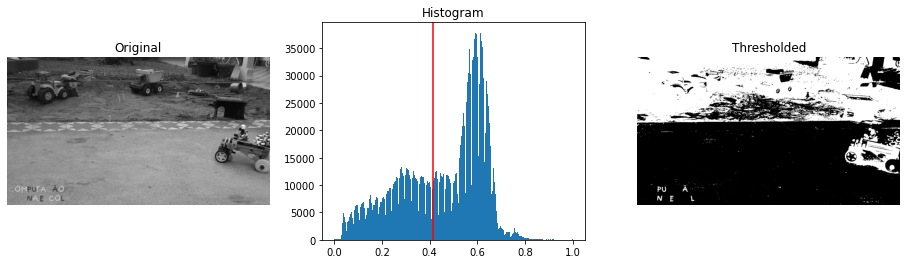

In [19]:
from skimage.filters import threshold_otsu
# Otsu’s method 2 calculates an “optimal” threshold (marked by a red line in the histogram below) 
# by maximizing the variance between two classes of pixels, which are separated by the threshold.

thresh = threshold_otsu(images[0])
print("Threshold: ", thresh)
binary = images[0] <= thresh

fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(images[0], cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(images[0].ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

Threshold:  0.18671005974264707


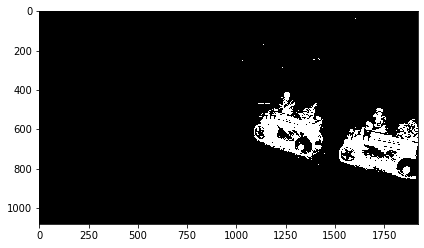

In [20]:
thresh = threshold_otsu(diff_01)
print("Threshold: ", thresh)
binary_01 = diff_01 > thresh
io.imshow(binary_01, cmap=plt.cm.gray)

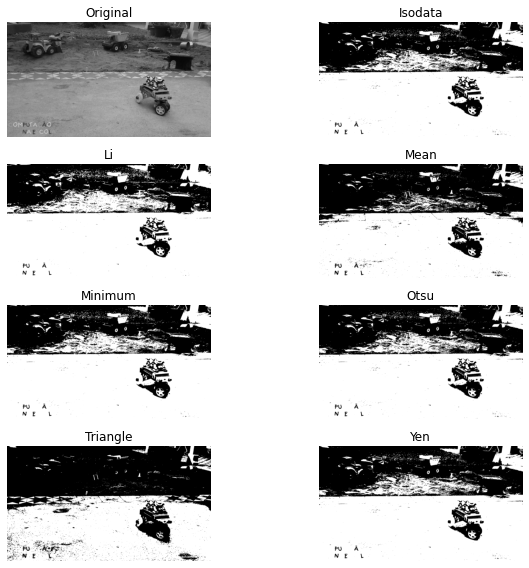

In [10]:
from skimage.filters import try_all_threshold



# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(images[0], figsize=(10, 8), verbose=False)


In [22]:
from skimage.morphology import opening, closing, square

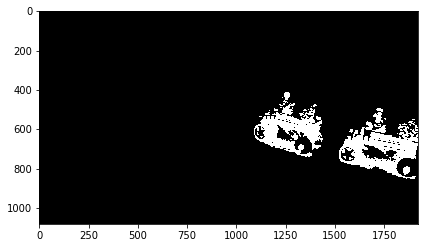

In [26]:
opened_image = opening(binary_01, square(5))
io.imshow(opened_image)

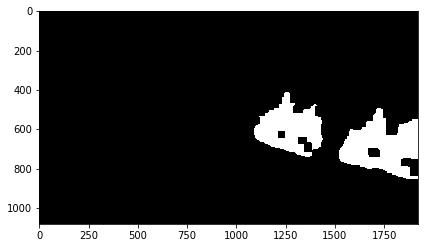

In [31]:
closed_image = closing(opened_image, square(35))
io.imshow(closed_image)

In [41]:
import pandas as pd


In [43]:
split_df = pd.DataFrame(closed_image).sum()

In [100]:
split_df.max()

309

<AxesSubplot:>

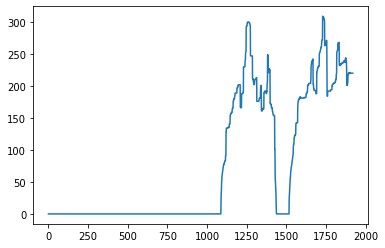

In [45]:
split_df.plot.line()

<AxesSubplot:>

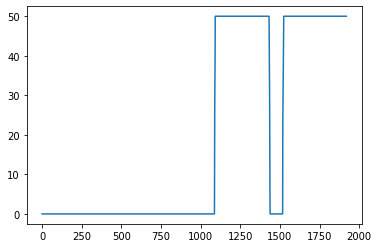

In [101]:
clip_threshold = 50
np.clip(split_df,0,clip_threshold).plot.line()

In [102]:
s = np.clip(split_df,0,clip_threshold).diff()


In [49]:
s.where(s!=0).dropna()

1088    22.0
1089     7.0
1090     5.0
1091     5.0
1092    11.0
1432    -3.0
1433   -10.0
1434    -3.0
1435    -6.0
1436   -15.0
1437    -8.0
1438    -5.0
1518    23.0
1519     5.0
1520     6.0
1521     4.0
1522     7.0
1523     2.0
1524     3.0
dtype: float64

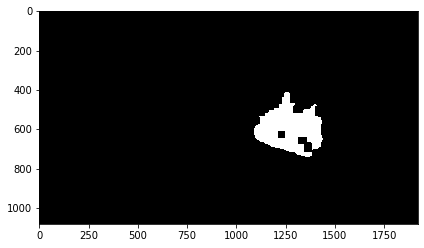

In [121]:
closed_left=np.copy(closed_image)
closed_left[:,1518:] = 0
io.imshow(closed_left)

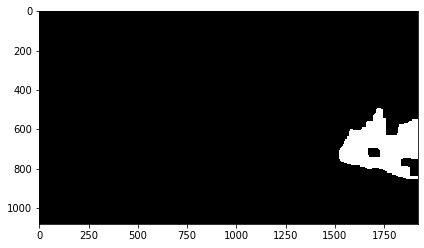

In [120]:
closed_right = np.copy(closed_image)
closed_right[:,:1518] = 0
io.imshow(closed_right)